Simple Model for Case study


**Data Analysis Case Study – Yield Estimation from Drone Imagery**

# **1. Problem Statement**

Estimating crop yield accurately is a crucial aspect of precision agriculture, enabling farmers to optimize resources and improve productivity. With advancements in drone technology, high-resolution imagery can be utilized to assess crop health and predict yields. The challenge lies in effectively processing and analyzing this imagery to generate reliable yield estimates. This case study focuses on developing a structured methodology for estimating maize yield using RGB drone imagery.

# **2. Research Objectives**

The main objectives of this study are:

1. To explore methods for processing high-resolution drone imagery for yield estimation.
2. To develop an analytical approach for extracting relevant features from drone data.
3. To apply machine learning and empirical models for estimating maize yield.
4. To validate and refine the model using ground-truth data and environmental factors.

# **3. Methodology**

## **3.1 Data Acquisition & Understanding**

- **Import high-resolution RGB drone imagery**: The first step involves collecting and loading drone images in standard formats such as png
- **Georeferencing and dividing the farm into four equal blocks**: This step ensures accurate spatial analysis and segmentation.
- **Extract relevant metadata**: Information such as GPS coordinates, timestamps, and weather conditions is collected to improve model accuracy.
## **3.2 Pre-processing the Data**

- **Image Enhancement**: Contrast adjustments and noise reduction techniques are applied to improve image clarity.
- **Segmentation**: Identifying maize plants using **computer vision techniques** such as OpenCV-based thresholding or deep learning-based segmentation (e.g., U-Net CNN model).
- **Feature Extraction**: Compute vegetation indices like the **Green Leaf Index (GLI)**, which serves as a proxy for plant health.



In [2]:
import os

image_paths = [
    r"C:\Users\JOSHUA\object-detection\image1.png",
    r"C:\Users\JOSHUA\object-detection\image2.png",
    r"C:\Users\JOSHUA\object-detection\image3.png"
]


if os.path.exists(path):
    print(f"File found: {path}")
else:
    print(f"File not found: {path}")

File found: C:\Users\JOSHUA\object-detection\image3.png


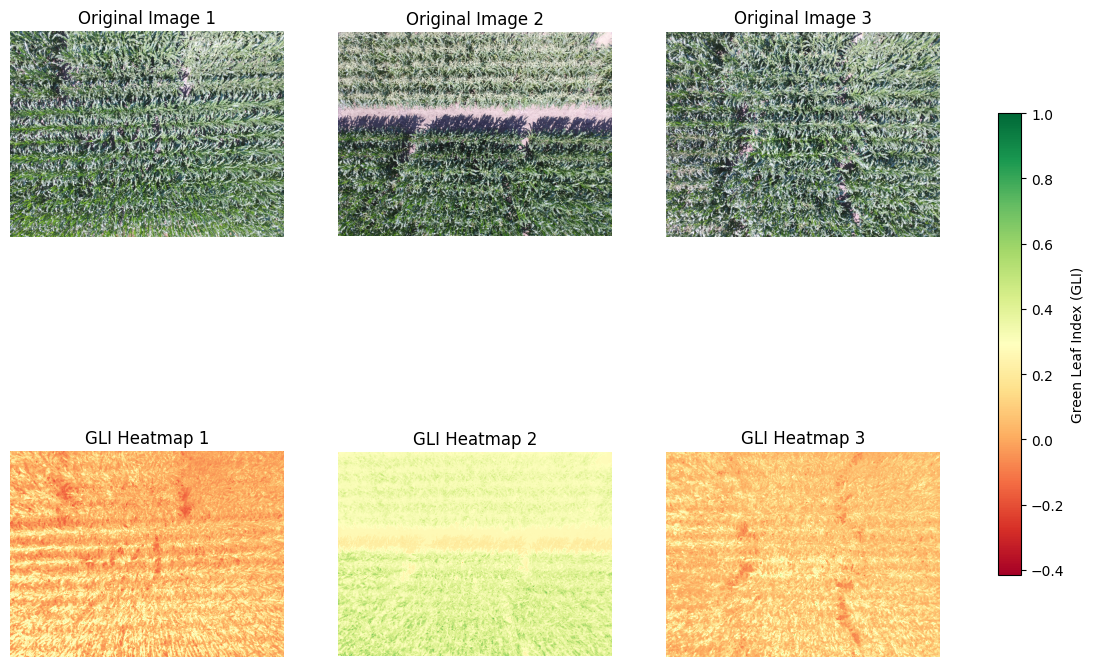

In [3]:
## Required Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image_paths = [
    r'C:\Users\JOSHUA\object-detection\image1.png',
    r'C:\Users\JOSHUA\object-detection\image2.png',
    r'C:\Users\JOSHUA\object-detection\image3.png'
]

# Check if files exist and load images
images = []
for img_path in image_paths:
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
        else:
            print(f"Failed to load image: {img_path}")
    else:
        print(f"File not found: {img_path}")

# Ensure there are valid images to process
if not images:
    print("No valid images to process. Exiting.")
else:
    # Convert images from BGR to RGB
    images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

    ## Image Processing Functions
    # Function to compute Green Leaf Index (GLI)
    def compute_gli(image):
        # Convert to float to avoid overflow issues
        image = image.astype(np.float32)
        R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
        GLI = (2 * G - R - B) / (2 * G + R + B + 1e-6)  # Add small constant to avoid division by zero
        return GLI

    # Compute GLI for each image
    gli_maps = [compute_gli(img) for img in images_rgb]

    # Plot results
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    titles = ["Original Image 1", "Original Image 2", "Original Image 3",
              "GLI Heatmap 1", "GLI Heatmap 2", "GLI Heatmap 3"]

    for i, (img, gli_map, title) in enumerate(zip(images_rgb, gli_maps, titles[:3])):
        axes[0, i].imshow(img)
        axes[0, i].set_title(title)
        axes[0, i].axis("off")

    for i, (gli_map, title) in enumerate(zip(gli_maps, titles[3:])):
        im = axes[1, i].imshow(gli_map, cmap="RdYlGn")  # Green = high GLI, Red = low GLI
        axes[1, i].set_title(title)
        axes[1, i].axis("off")

    # Add color bar
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    cbar.set_label("Green Leaf Index (GLI)")

    plt.show()